Dataset: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load the data
df = pd.read_csv('wine-clustering.csv')

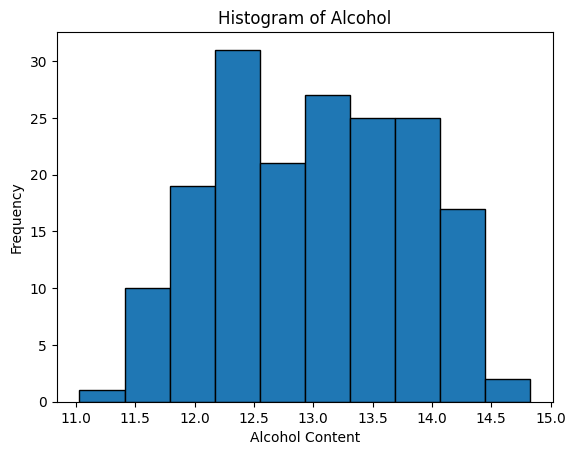

In [3]:
# Histogram of 'Alcohol' column
plt.hist(df['Alcohol'], bins=10, edgecolor='black')
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

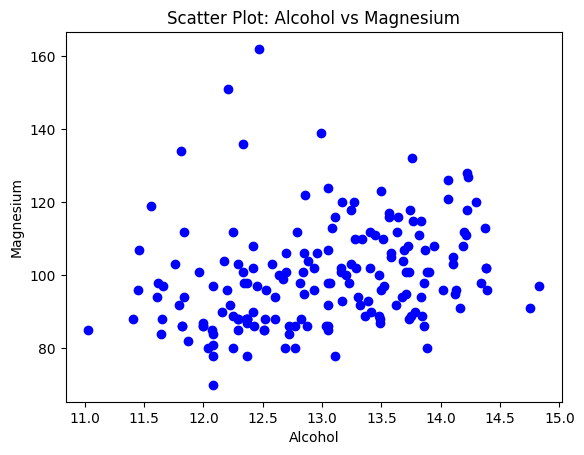

In [4]:
# Scatter plot between 'Alcohol' and 'Magnesium'
plt.scatter(df['Alcohol'], df['Magnesium'], c='blue')
plt.title('Scatter Plot: Alcohol vs Magnesium')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.show()

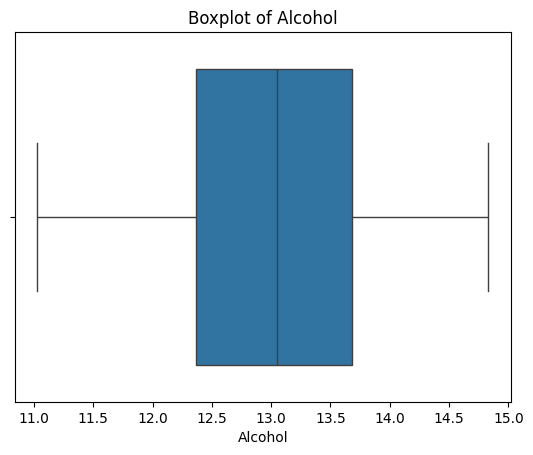

In [5]:
# Boxplot for 'Alcohol'
sns.boxplot(x=df['Alcohol'])
plt.title('Boxplot of Alcohol')
plt.show()

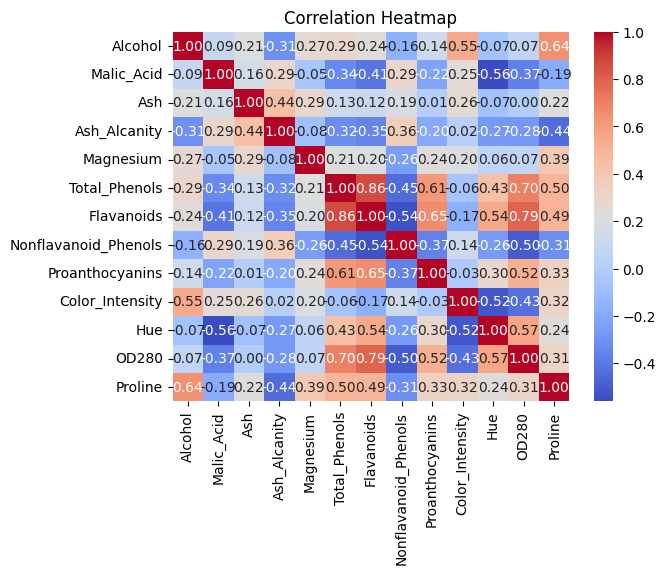

In [6]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

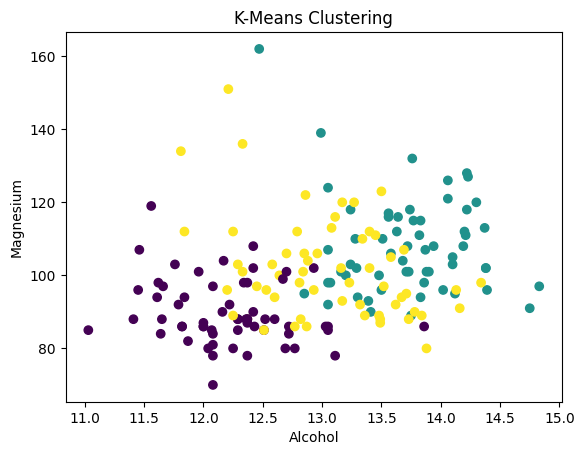

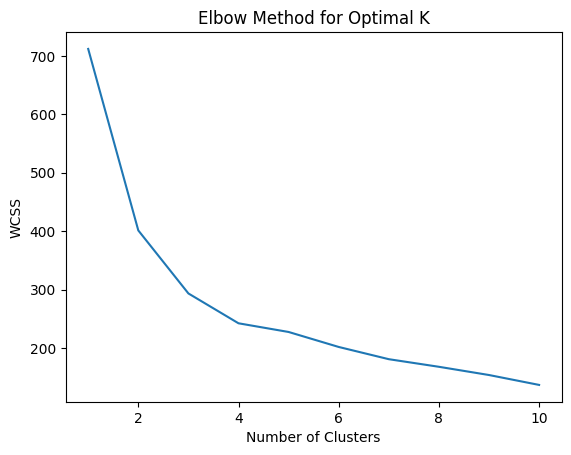

Silhouette Score: 0.24721895390967782


In [7]:
# K-Means Clustering
X = df[['Alcohol', 'Magnesium', 'Flavanoids', 'Proline']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot K-Means Clusters
plt.scatter(df['Alcohol'], df['Magnesium'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.show()

# Elbow Plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")